# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Getting the data

In [3]:
data = pd.read_csv('fatal-police-shootings-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Looking for missing data in the dataset

In [5]:
miss_data = data.isna().sum()*100/data.shape[0]
miss_data

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      4.191285
age                        4.338996
gender                     0.036928
race                       9.619645
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       4.597489
body_camera                0.000000
dtype: float64

In [6]:
data.dropna(inplace=True)

# Looking for unique data within the set

In [7]:
cardinality = {}
for col in data.columns:
    cardinality[col] = data[col].nunique()

cardinality

{'id': 4399,
 'name': 4377,
 'date': 1733,
 'manner_of_death': 2,
 'armed': 90,
 'age': 75,
 'gender': 2,
 'race': 6,
 'city': 2116,
 'state': 51,
 'signs_of_mental_illness': 2,
 'threat_level': 3,
 'flee': 4,
 'body_camera': 2}

In [8]:
print("Race: ")
print(data['race'].unique())
print("Manner of death: ")
print(data['manner_of_death'].unique())
print("Threat Level: ") 
print(data['threat_level'].unique())

Race: 
['A' 'W' 'H' 'B' 'O' 'N']
Manner of death: 
['shot' 'shot and Tasered']
Threat Level: 
['attack' 'other' 'undetermined']


In [9]:
data['armed'].value_counts()

gun                    2596
knife                   660
unarmed                 336
toy weapon              165
vehicle                 117
                       ... 
metal rake                1
fireworks                 1
vehicle and machete       1
bayonet                   1
wasp spray                1
Name: armed, Length: 90, dtype: int64

In [10]:
armed = data.groupby('armed')['armed'].agg('count').sort_values(ascending=True)
data['armed'] = data['armed'].apply(lambda x:'other' if x in armed[armed<=25] else x)
data['armed'].fillna('other',inplace = True)
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'other', 'knife', 'undetermined',
       'machete', 'unknown weapon', 'vehicle'], dtype=object)

In [11]:
data['armed'] = np.where((data.armed == 'undetermined'),'other',data.armed)
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'other', 'knife', 'machete',
       'unknown weapon', 'vehicle'], dtype=object)

In [12]:
data['armed'] = np.where((data.armed == 'unknown weapon'),'other',data.armed)
data['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'other', 'knife', 'machete',
       'vehicle'], dtype=object)

In [13]:
data.age.median()

34.0

In [14]:
data.age.fillna(data.age.median(),inplace=True)

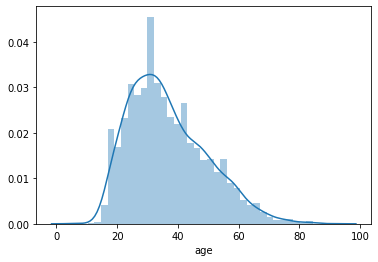

In [15]:
sns.distplot(data['age'])

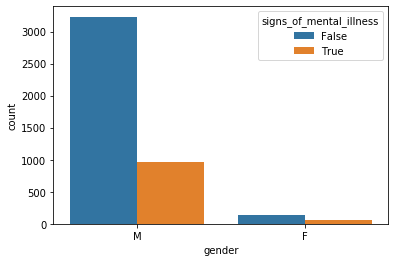

In [16]:
sns.countplot(x='gender',hue='signs_of_mental_illness',data=data)

In [17]:
data['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'UT', 'AR', 'IL', 'NV', 'NM', 'VA', 'NJ', 'IN', 'MN', 'KY',
       'MA', 'MO', 'NH', 'ID', 'MD', 'NE', 'MI', 'MT', 'GA', 'FL', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DC', 'WV', 'DE',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

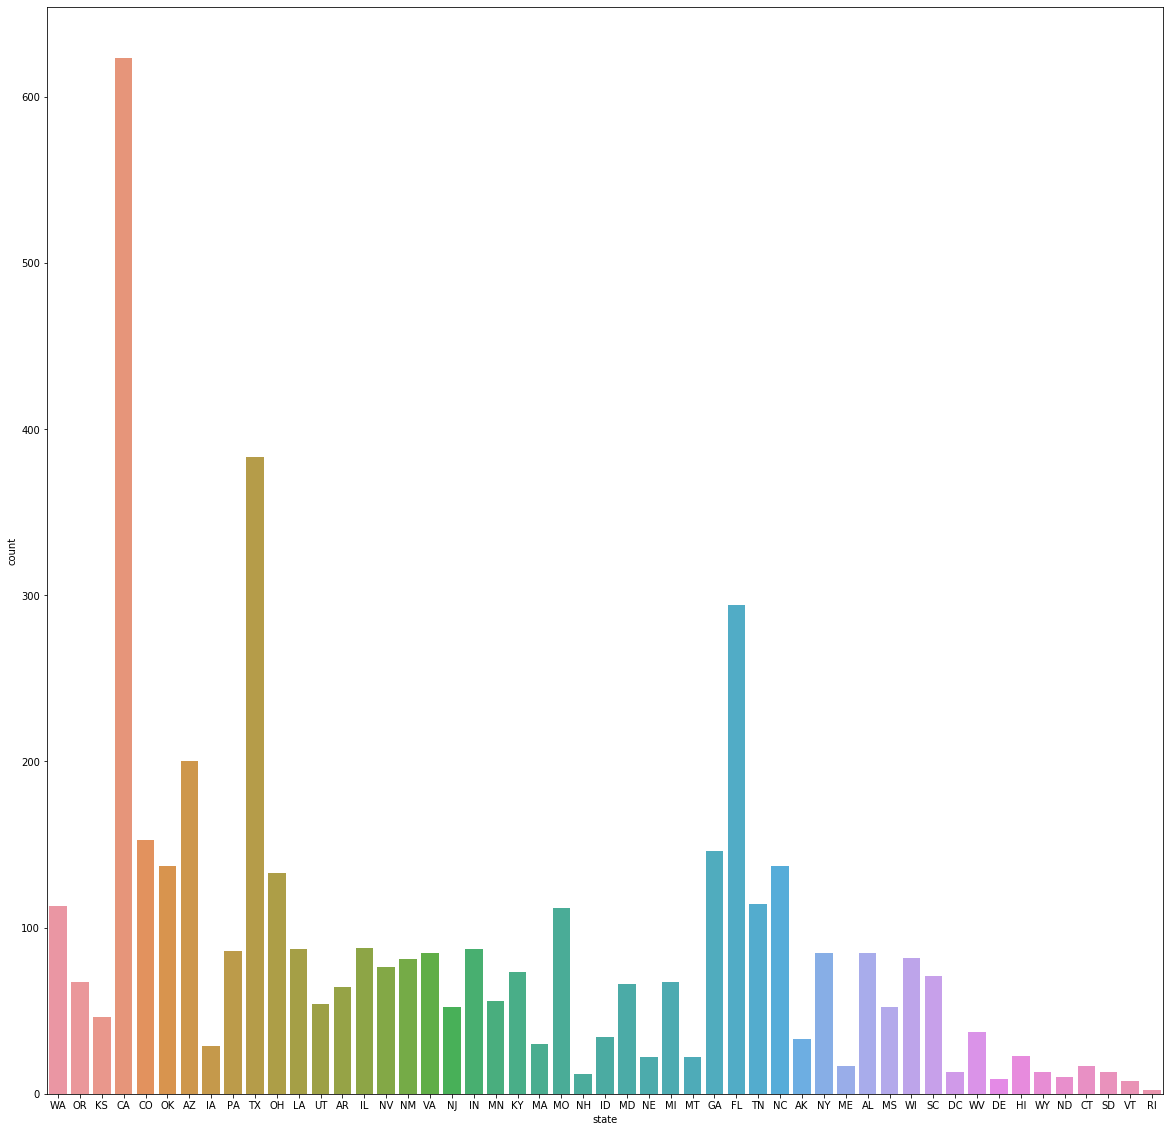

In [18]:
plt.figure(figsize=(20,20))
sns.countplot(x='state',data=data)

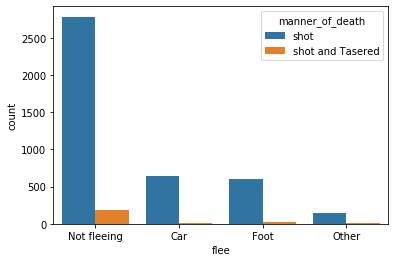

In [19]:
sns.countplot(x='flee',hue='manner_of_death',data=data)

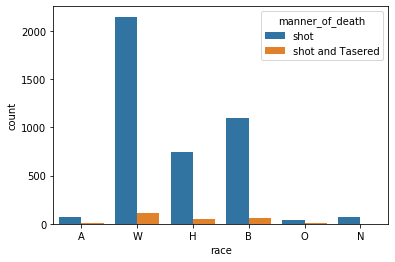

In [20]:
sns.countplot(x='race',hue='manner_of_death',data=data)

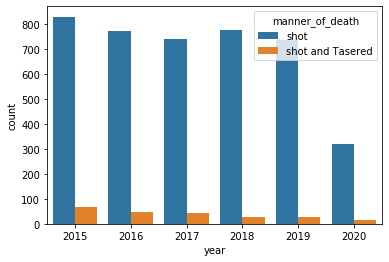

In [21]:
data["year"] = pd.to_datetime(data["date"]).dt.year
data.drop(columns='date',inplace=True)
sns.countplot(x='year',hue='manner_of_death',data=data)

Text(0.5, 0, 'Race vs Fleeing')

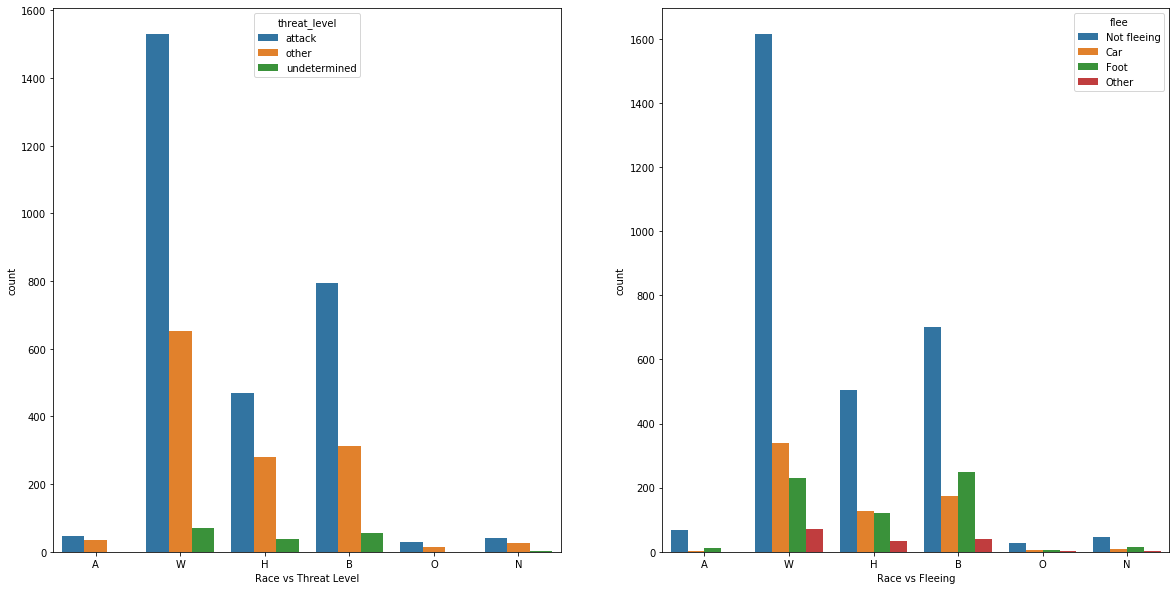

In [22]:
fig,a = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='race',hue='threat_level',data=data,ax=a[0])
a[0].set_xlabel("Race vs Threat Level")
sns.countplot(x='race',hue='flee',data=data)
a[1].set_xlabel("Race vs Fleeing")

# An interesting turn of events! 